Search for Treasure using the Best-First Search <br>
 
Objective: Use Best-First Search to find a treasure in a grid. <br>
 
Problem Statement: The treasure is hidden in a grid, and each cell has a heuristic value representing its "closeness" to the treasure. Implement Best-First Search to locate the treasure.
 <br>
Tasks:<br>
l. Use Manhattan distance as a heuristic.<br>
lI. Implement the algorithm to always move to the most promising cell first (minimum heuristic value).<br>
lII. Analyze how heuristic choice affects performance.<br>

In [19]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

In [21]:
DIRECTIONS = [(0, 1), (0, -1), (1, 0), (-1, 0)]

In [23]:
def manhattan_distance(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def best_first_search(grid, start, treasure):
    rows, cols = len(grid), len(grid[0])
    visited = set()
    pq = []
    heapq.heappush(pq, (manhattan_distance(start, treasure), start))
    path = []
    
    while pq:
        _, current = heapq.heappop(pq)
        if current in visited:
            continue
        
        visited.add(current)
        path.append(current)
        
        if current == treasure:
            return path
        
        for d in DIRECTIONS:
            neighbor = (current[0] + d[0], current[1] + d[1])
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and neighbor not in visited:
                heapq.heappush(pq, (manhattan_distance(neighbor, treasure), neighbor))
    
    return None  

In [11]:
def visualize(grid, path, start, treasure):
    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(len(grid[0]) + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(len(grid) + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
    ax.tick_params(which="both", bottom=False, left=False, labelbottom=False, labelleft=False)
    
    for y in range(len(grid)):
        for x in range(len(grid[0])):
            if (y, x) == start:
                ax.text(x, y, 'S', ha='center', va='center', fontsize=12, color='blue')
            elif (y, x) == treasure:
                ax.text(x, y, 'T', ha='center', va='center', fontsize=12, color='red')
            elif (y, x) in path:
                ax.text(x, y, '*', ha='center', va='center', fontsize=10, color='green')
    
    plt.show()

In [35]:
def visualized(grid, path, start, treasure):
    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(len(grid[0]) + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(len(grid) + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
    ax.tick_params(which="both", bottom=False, left=False, labelbottom=False, labelleft=False)
    
    for y in range(len(grid)):
        for x in range(len(grid[0])):
            coord_text = f'({y},{x})'
            ax.text(x, y, coord_text, ha='center', va='center', fontsize=8, color='black')
            
            if (y, x) == start:
                ax.text(x, y, 'S', ha='center', va='center', fontsize=12, color='blue', fontweight='bold')
            elif (y, x) == treasure:
                ax.text(x, y, 'T', ha='center', va='center', fontsize=12, color='red', fontweight='bold')
            elif (y, x) in path:
                ax.text(x, y, '*', ha='center', va='center', fontsize=10, color='green', fontweight='bold')
    
    plt.show()

In [49]:
def visualizedd(grid, path, start, treasure):
    fig, ax = plt.subplots(figsize=(len(grid[0]), len(grid)))
    ax.set_xticks(np.arange(len(grid[0]) + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(len(grid) + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
    ax.tick_params(which="both", bottom=False, left=False, labelbottom=False, labelleft=False)
    
    for y in range(len(grid)):
        for x in range(len(grid[0])):
            coord_text = f'({y},{x})'
            ax.text(x, y, coord_text, ha='center', va='center', fontsize=8, color='gray', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))
            
            if (y, x) == start:
                ax.text(x, y, 'S', ha='center', va='center', fontsize=12, color='blue', fontweight='bold')
            elif (y, x) == treasure:
                ax.text(x, y, 'T', ha='center', va='center', fontsize=12, color='red', fontweight='bold')
            elif (y, x) in path:
                ax.add_patch(plt.Rectangle((x-0.5, y-0.5), 1, 1, color='lightgreen', alpha=0.5))
                ax.text(x, y, '*', ha='center', va='center', fontsize=10, color='green', fontweight='bold')
    
    plt.show()

The starting position is: (0, 0)
The Treasure is at: (5, 8)
The path covered is [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 8), (2, 8), (3, 8), (4, 8), (5, 8)]


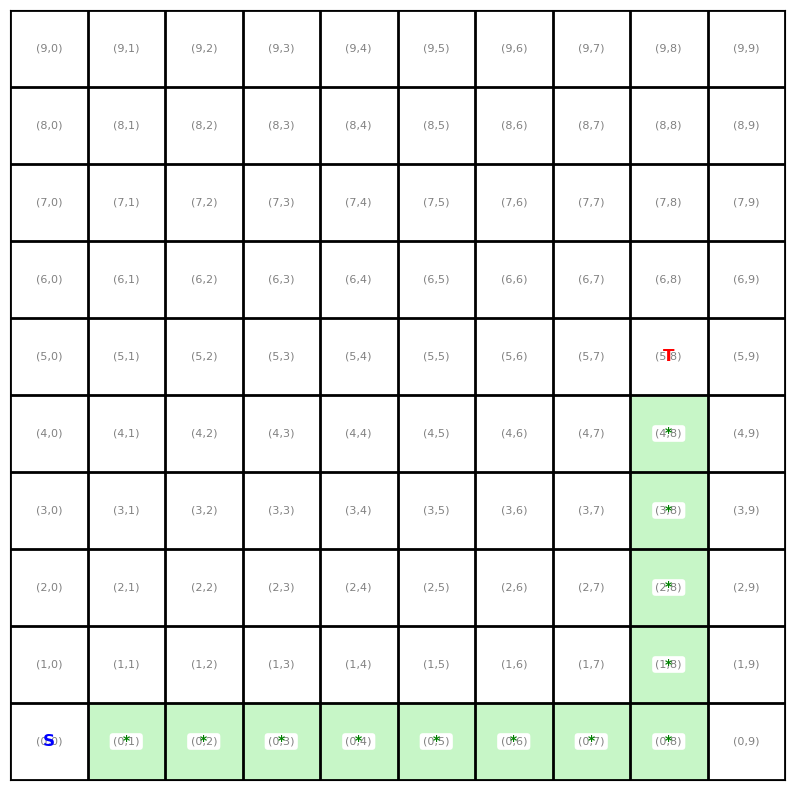

In [57]:
grid_size = (10, 10)
grid = [[0 for _ in range(grid_size[1])] for _ in range(grid_size[0])]

start = (0, 0)
treasure = (5, 8)
print("The starting position is:",start)
print("The Treasure is at:",treasure)

path = best_first_search(grid, start, treasure)
print("The path covered is", path)
if path:
    visualizedd(grid, path, start, treasure)
else:
    print("Treasure not found.")